In [1]:
#cargar drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#cargar tensorflow y keras

from tensorflow import keras

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Definir las etiquetas de las plantas
nombres_plantas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Cargar el dataset desde el archivo pickle
def cargar_pickle(ruta_archivo):
    with open(ruta_archivo, 'rb') as f:
        dataset = pickle.load(f)
    return dataset

# Cargar datos de entrenamiento
ruta_archivo_pickle_train = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dataHojas_7.pkl'
dataset_train = cargar_pickle(ruta_archivo_pickle_train)

# Crear listas para almacenar todas las imágenes y etiquetas de entrenamiento
train_images = []
train_labels = []

for imagen_array, etiqueta in dataset_train:
    train_images.append(imagen_array)
    train_labels.append(etiqueta)

# Convertir listas a arrays de NumPy
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Verificar las dimensiones
print("Dimensiones de train_images:", train_images.shape)
print("Dimensiones de train_labels:", train_labels.shape)

import pickle
import numpy as np
import random

# Definir las etiquetas de las plantas
nombres_plantas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Cargar datos de prueba
ruta_archivo_pickle_test = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/pruebas.pkl'
dataset_test = cargar_pickle(ruta_archivo_pickle_test)

# Crear listas para almacenar todas las imágenes y etiquetas de prueba
test_images = []
test_labels = []

for imagen_array, etiqueta in dataset_test:
    test_images.append(imagen_array)
    test_labels.append(etiqueta)

# Convertir listas a arrays de NumPy
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Verificar las dimensiones
print("Dimensiones de test_images:", test_images.shape)
print("Dimensiones de test_labels:", test_labels.shape)

Dimensiones de train_images: (250, 800, 900, 3)
Dimensiones de train_labels: (250,)
Dimensiones de test_images: (200, 800, 900, 3)
Dimensiones de test_labels: (200,)


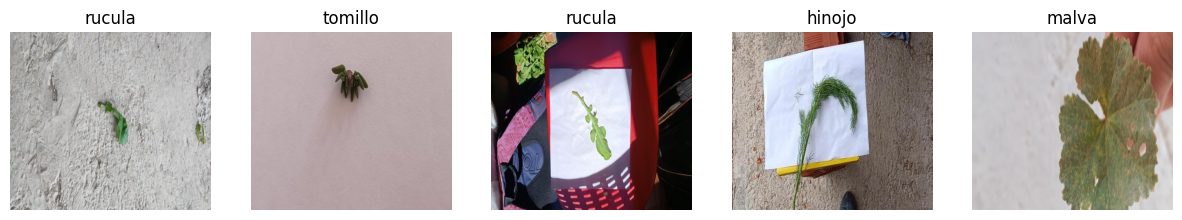

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Número de imágenes aleatorias que quieres mostrar
num_imagenes = 5

# Tomar índices aleatorios
indices_aleatorios = np.random.choice(len(train_images), num_imagenes, replace=False)

# Crear una figura con subplots para mostrar las imágenes
fig, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))

# Mostrar cada imagen
for i, idx in enumerate(indices_aleatorios):
    imagen = train_images[idx]
    etiqueta = train_labels[idx]
    etiqueta_nombre = nombres_plantas[np.argmax(etiqueta)]  # Convertir la etiqueta one-hot a nombre

    # Mostrar la imagen
    axs[i].imshow(imagen)
    axs[i].set_title(etiqueta_nombre)
    axs[i].axis('off')  # No mostrar los ejes

plt.show()

In [5]:
from PIL import Image
import numpy as np

# Función para redimensionar las imágenes
def redimensionar_imagenes(imagenes, nuevo_tamano):
    imagenes_redimensionadas = []
    for imagen in imagenes:
        imagen_pil = Image.fromarray(imagen)  # Convertir a formato PIL
        imagen_pil = imagen_pil.resize(nuevo_tamano, Image.ANTIALIAS)  # Redimensionar la imagen
        imagen_redimensionada = np.array(imagen_pil)  # Convertir de nuevo a array de NumPy
        imagenes_redimensionadas.append(imagen_redimensionada)
    return np.array(imagenes_redimensionadas)

# Redimensionar las imágenes de entrenamiento y prueba
nuevo_tamano = (112, 100)  # Nuevo tamaño de las imágenes (puedes ajustar según sea necesario)
train_images_redimensionadas = redimensionar_imagenes(train_images, nuevo_tamano)
test_images_redimensionadas = redimensionar_imagenes(test_images, nuevo_tamano)

# Verificar las nuevas dimensiones
print("Dimensiones de train_images_redimensionadas:", train_images_redimensionadas.shape)
print("Dimensiones de test_images_redimensionadas:", test_images_redimensionadas.shape)


<ipython-input-5-6f8f992b247f>:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen_pil = imagen_pil.resize(nuevo_tamano, Image.ANTIALIAS)  # Redimensionar la imagen


Dimensiones de train_images_redimensionadas: (250, 100, 112, 3)
Dimensiones de test_images_redimensionadas: (200, 100, 112, 3)


In [6]:
# Suponiendo que ya tienes 'train_images', 'train_labels', 'test_images' y 'test_labels' como arrays de NumPy

# Normalizar los datos
train_images_redimensionadas = train_images_redimensionadas / 255.0
test_images_redimensionadas = test_images_redimensionadas / 255.0

# Convertir las etiquetas a formato categórico
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(112, 100, 3)))  # Ajustado al nuevo tamaño
# Continuar con el resto del modelo...
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))  # Cambiado de 32 a 16
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Cambiado de 256 a 128
model.add(layers.Dense(5, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer=Adam(learning_rate=0.0002), # Use learning_rate instead of lr
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images_redimensionadas, train_labels,
                    epochs=1000,
                    batch_size=4,
                    validation_data=(test_images_redimensionadas, test_labels),
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
                    ])

Epoch 1/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.2946 - loss: 1.5855 - val_accuracy: 0.3600 - val_loss: 1.4694
Epoch 2/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4357 - loss: 1.4127 - val_accuracy: 0.5250 - val_loss: 1.1802
Epoch 3/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.6182 - loss: 1.0650 - val_accuracy: 0.6400 - val_loss: 1.0140
Epoch 4/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6300 - loss: 0.9387 - val_accuracy: 0.6850 - val_loss: 0.9026
Epoch 5/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.7030 - loss: 0.8676 - val_accuracy: 0.7300 - val_loss: 0.8141
Epoch 6/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7548 - loss: 0.7711 - val_accuracy: 0.7700 - val_loss: 0.7395
Epoch 7/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7928 - loss: 0.6358 - val_accuracy: 0.8200 - val_loss: 0.6451
Epoch 8/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.7876 - loss: 0.6020 - val_accu

In [10]:
# Ruta en Google Drive donde quieres guardar el modelo
model_path = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasCNN_keras_redimensionado.h5'

# Guardar el modelo
model.save(model_path)

print(f"Modelo guardado en {model_path}")

Modelo guardado en /content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasCNN_keras_redimensionado.h5


In [11]:
import os

In [13]:
from tensorflow.keras.models import load_model


if os.path.exists(model_path):
    model = load_model(model_path)
    print(f"Modelo cargado desde {model_path}")
else:
    print(f"No se encontró el archivo {model_path}.")

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images_redimensionadas, test_labels)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")


Modelo cargado desde /content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasCNN_keras_redimensionado.h5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.8592 - loss: 0.4889
Precisión en el conjunto de prueba: 0.8700
